In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data_result = pd.read_csv('data_test_result.csv')
data_result['Date'] = pd.to_datetime(data_result['Date'])
data_result['Date'] = data_result['Date'].dt.date
data_result.set_index('Date', inplace=True)
data_losses = pd.read_csv('data_test_losses.csv')
data_losses.drop(columns=['Unnamed: 0'], inplace=True)
data_losses.set_index(data_result.index[::30], inplace=True)

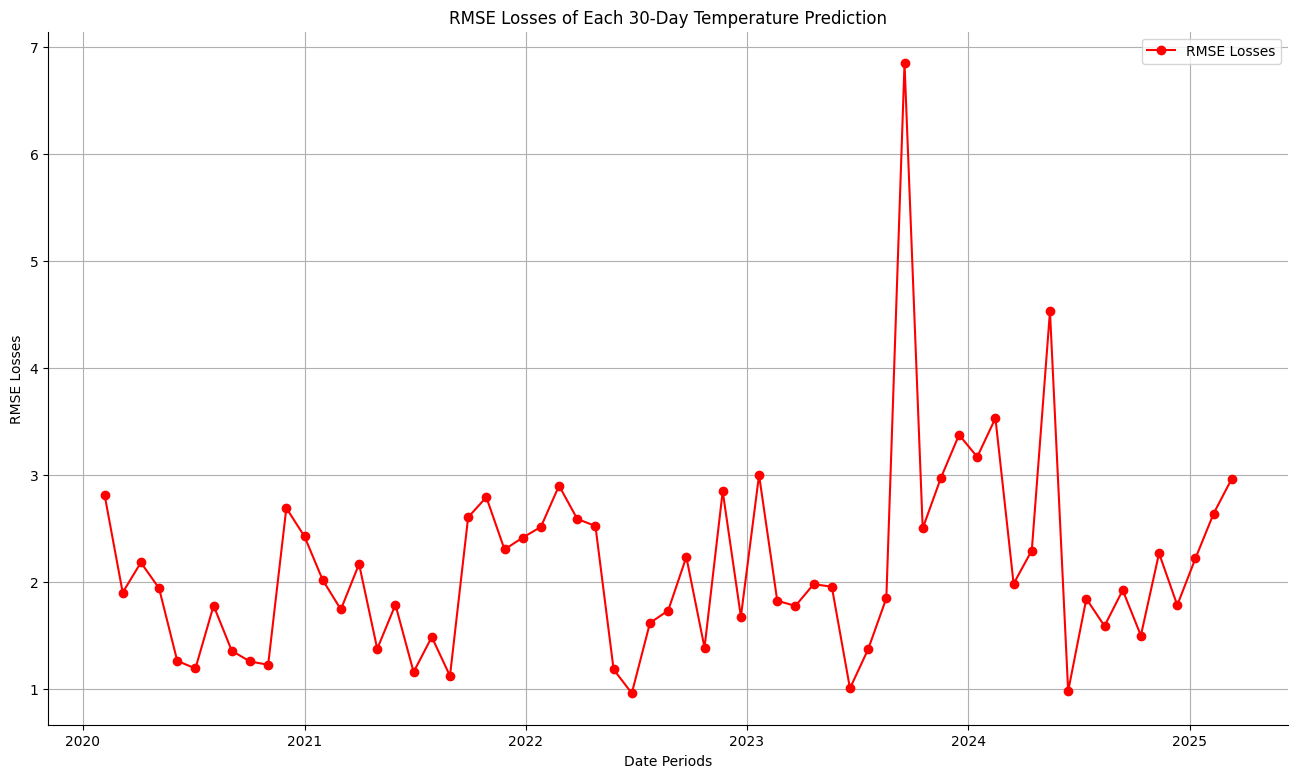

In [37]:
plt.figure(figsize=(16, 9))

# 绘制折线图
plt.plot(data_losses, label='RMSE Losses', marker='o', color = 'red')

# 添加标题和标签
plt.title('RMSE Losses of Each 30-Day Temperature Prediction')
plt.xlabel('Date Periods')
plt.ylabel('RMSE Losses')

# 去掉两边框线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 显示图例
plt.grid()
plt.legend()
plt.show()

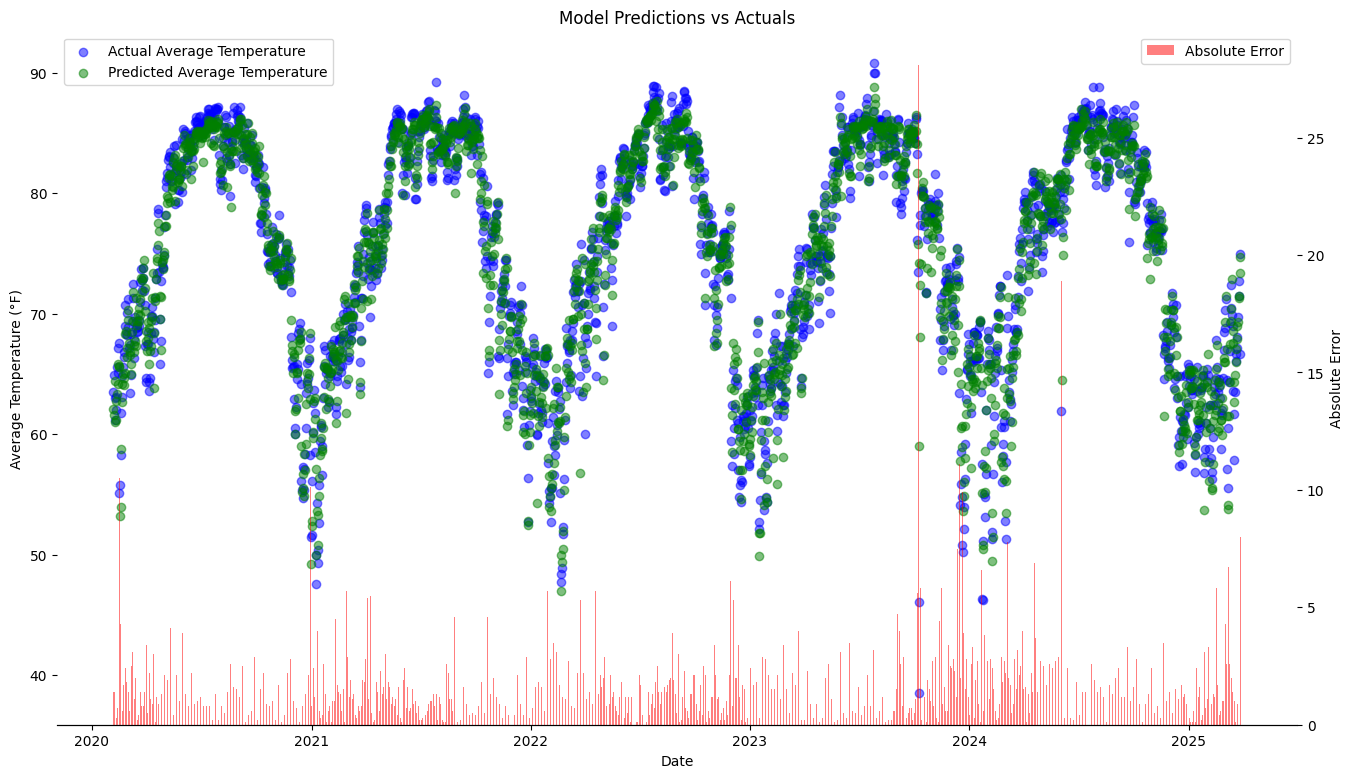

In [62]:
plt.figure(figsize=(16, 9))

# 绘制散点图
plt.scatter(data_result.index, data_result['actual'], label='Actual Average Temperature', color='blue', alpha=0.5)
plt.scatter(data_result.index, data_result['pred'], label='Predicted Average Temperature', color='green', alpha=0.5)

# 计算绝对误差
absolute_errors = np.abs(data_result['actual'] - data_result['pred'])

# 创建第二个y轴
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.bar(data_result.index, absolute_errors, color='red', alpha=0.5, label='Absolute Error', width=0.5)

# 添加标题和标签
plt.title('Model Predictions vs Actuals')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature (°F)')
ax2.set_ylabel('Absolute Error')

# 去掉顶部、右侧和左侧的边框线
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()